#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
import plotly.express as px

#### Reading the Data

In [4]:
df=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
print(f'Shape of Training Data {df.shape} and test data {df_test.shape}')

Shape of Training Data (10683, 11) and test data (2671, 10)


In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.shape

(10683, 11)

As we have 10683 rows, and total missing values are 2 , therefore we can delete the null rows.

In [11]:
df.dropna(inplace=True)

##### Removing Null rows

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We have removed the Null value rows from the dataset. 

##### Converting feature 'Date_of_Journey' , 'Dep_Time', 'Arrival_Time', to timestamp

In [13]:
data=df.copy()

In [14]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [15]:
def change_to_timestamp(col):
    data[col]=pd.to_datetime(data[col])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_to_timestamp(feature)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [20]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-01 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-01 05:50:00,2022-12-01 13:15:00,7h 25m,2 stops,No info,7662


In [21]:
data['Journey_Year']=data['Date_of_Journey'].dt.year
data['Journey_Month']=data['Date_of_Journey'].dt.month
data['Journey_Day']=data['Date_of_Journey'].dt.day
data.drop('Date_of_Journey',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-12-01 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-01 05:50:00,2022-12-01 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-01 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-12-01 18:05:00,2022-12-01 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-12-01 16:50:00,2022-12-01 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Source           10682 non-null  object        
 2   Destination      10682 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10682 non-null  datetime64[ns]
 5   Arrival_Time     10682 non-null  datetime64[ns]
 6   Duration         10682 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10682 non-null  object        
 9   Price            10682 non-null  int64         
 10  Journey_Year     10682 non-null  int64         
 11  Journey_Month    10682 non-null  int64         
 12  Journey_Day      10682 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(7)
memory usage: 1.1+ MB


Similarly featurizing the 'Dep_Time' and 'Arrival_Time'.

In [23]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [24]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-01 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50


In [25]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


We have cleaned the feature Arrival_Time and Dep_Time

###### Analyzing the time of flight Departure (Morning or TIme)

In [26]:
def flight_dep_time(x):
    
    if x > 4 and x<=8:
        return 'Early mrng'
    
    elif x>8 and x<=12 :
        return 'Morning'
    
    elif x>12 and x<=16 :
        return 'Noon'
    
    elif x>16 and x<=20 :
        return 'Evening'
    
    elif x>20 and x<=24 :
        return 'Night'
    else:
        return 'Late night'

In [29]:
data['Dep_Timing']=data['Dep_Time_hour'].apply(flight_dep_time)

<AxesSubplot:>

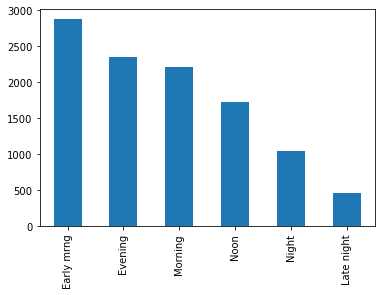

In [44]:
data.Dep_Timing.value_counts().plot(kind='bar')

Based on the above plot we can say that we have more number of flights in Early Morning and Evening.

###### Analyzing wheather duration has any realtion with price of the ticket.
This can be done when we convert the duration to minutes.

In [52]:
data.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

We can convert the timings in hour to minutes.

converting the duration to minutes.

In [53]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dep_Timing,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,Night,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15,Early mrng,445


In [123]:
px.scatter(data_frame=data,x='Duration_total_mins',y='Price',color='Airline')

##### Analyzing source and destinations

([<matplotlib.patches.Wedge at 0x1e078a0e340>,
 [Text(0.258000834752452, 1.0693154676086183, 'Cochin'),
  Text(-1.0252167974935686, -0.3986609062060528, 'Banglore'),
  Text(0.01811582038190579, -1.09985081581635, 'Delhi'),
  Text(0.6766949505994535, -0.8672277347001787, 'New Delhi'),
  Text(1.0002772808696399, -0.4576520090374782, 'Hyderabad'),
  Text(1.093101523813704, -0.12300023835813577, 'Kolkata')])

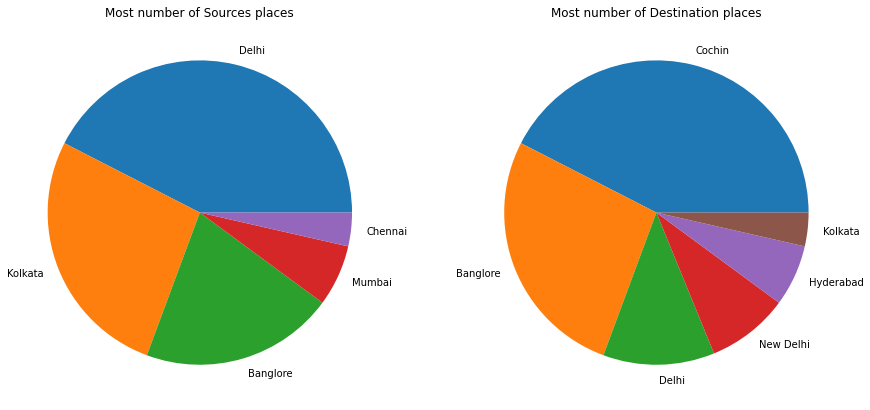

In [116]:

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.title('Most number of Sources places')
plt.pie(data.Source.value_counts(),labels=data.Source.value_counts().reset_index().iloc[:,0],)

plt.subplot(1, 2, 2)
plt.title('Most number of Destination places')
plt.pie(data.Destination.value_counts(),labels=data.Destination.value_counts().reset_index().iloc[:,0])
#px.pie(data_frame=data,names='Source',title='Source Places')
#plt.subplot(1,2,2)
#px.pie(data_frame=data,names='Destination',title='Most Destination Places')

We can convert the Source and Destination from string to interger by using lable enconding.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Duration             10682 non-null  object
 5   Total_Stops          10682 non-null  object
 6   Additional_Info      10682 non-null  object
 7   Price                10682 non-null  int64 
 8   Journey_Year         10682 non-null  int64 
 9   Journey_Month        10682 non-null  int64 
 10  Journey_Day          10682 non-null  int64 
 11  Dep_Time_hour        10682 non-null  int64 
 12  Dep_Time_minute      10682 non-null  int64 
 13  Arrival_Time_hour    10682 non-null  int64 
 14  Arrival_Time_minute  10682 non-null  int64 
 15  Dep_Timing           10682 non-null  object
 16  Dura

##### Analyzing airline and prices.

In [127]:
px.box(data_frame=data,x='Price',y='Airline',)

Conclusion : From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median